# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score
from seaborn import load_dataset

import statsmodels.formula.api as smf

In [3]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [ ]:
reg_1 = smf.ols('tip ~ net_bill', data=tips).fit()
reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sun, 10 Aug 2025   Prob (F-statistic):           5.02e-23
Time:                        12:26:53   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.0, 12.0)

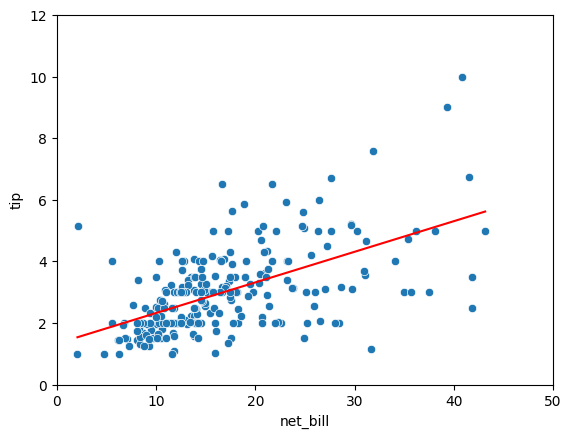

In [160]:
ax = sns.scatterplot(x = 'net_bill', y = 'tip', data = tips)

# Aqui eu poderia utilizar o regplot mas achei mais interessante criar a reta utilizando o proprio matplot
# x é basicamente onde a linha começa e termina, utilizando a função linspace do numpy
x = np.linspace(tips['net_bill'].min(),tips['net_bill'].max(),10)
# o y é basicamente a função de primeiro grau para a criação da reta usando os parametros do modelo de regreção previamente criado
y = (reg_1.params.iloc[1]*x) + reg_1.params.iloc[0] # Função do primeiro grau: y=ax+b ()

plt.plot(x, y, '-r', label='Linha da regreção')

plt.xlim(left=0, right=50)
plt.ylim(bottom=0, top=12)

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [144]:
reg_2 = smf.ols('tip_pct ~ net_bill', data=tips).fit()
reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Sun, 10 Aug 2025   Prob (F-statistic):           1.52e-06
Time:                        12:23:51   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [146]:
# reg_2.params.iloc[0]
# reg_2.params.iloc[1]
reg_2.params

Intercept    0.305297
net_bill    -0.006146
dtype: float64

(0.0, 3.0)

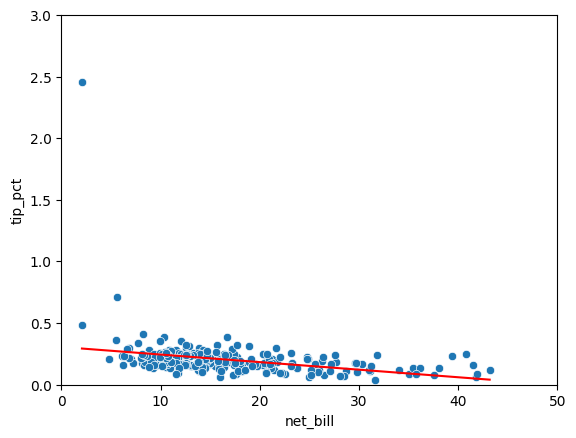

In [ ]:
ax = sns.scatterplot(x = 'net_bill', y = 'tip_pct', data = tips)

x = np.linspace(tips['net_bill'].min(),tips['net_bill'].max(),10)
y = (reg_2.params.iloc[1]*x) + reg_2.params.iloc[0]

plt.plot(x, y, '-r', label='Linha da regreção')

plt.xlim(left=0, right=50)
plt
plt.ylim(bottom=0, top=3)

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

Os dois gráficos comparam utilizando a conta liquida, porem de perspectivas diferentes, um em relação ao valor da gorjeta, e o outro utilizando o valor da gorjeta em relação ao valor da conta do restaurante.
É interessante notar que conforme o valor da conta aumenta, o valor da gorjeta tambem é maior, porém analisando o valor percentual da gorjeta em relação a conta, é notório a pequena relação inversa dessas duas variáveis, mostrando que, quanto maior o valor da conta, levemente menor é o valor percentual da gorjeta.

In [173]:
print(f'O valor do R quadrado do primeiro modelo é: {reg_1.rsquared:.4f}')
print(f'O valor do R quadrado do segundo modelo é: {reg_2.rsquared:.4f}')

O valor do R quadrado do primeiro modelo é: 0.3325
O valor do R quadrado do segundo modelo é: 0.0913


Não podemos comparar diretamente o resultado do R2 por si só pois o R2 é muito sensível a outliers. O segundo modelo pode possuir outliers mais acentuados por se tratar de percentuais.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [ ]:
reg_2.fittedvalues.to_frame()
tips_pred = tips.copy()
tips_pred['tip_pct_pred'] = reg_2.fittedvalues
tips_pred['tip_pred'] = tips_pred['tip_pct_pred'] * tips_pred['net_bill']
# tips_pred.head()

tips_pred[['tip', 'tip_pred']]
y_medio = tips_pred['tip'].mean()
r2_1 = float(((tips_pred['tip'] - tips_pred['tip_pred']) **2).sum())
r2_2 = float(((tips_pred['tip'] - y_medio) **2).sum())
r2_reg2 = 1 - (r2_1/r2_2)
r2_reg2

0.10889974845461325

In [224]:
y_true = tips_pred['tip']
y_pred = tips_pred['tip_pred']

r2_reg2 = r2_score(y_true, y_pred)
print(r2_reg2)

0.10889974845461325


Fiz o calculo do R2 desse segundo modelo de duas maneiras diferentes, porem resolvi refazer o modelo removendo outliers para avaliar o R2 desse novo modelo

In [228]:
reg_2_1 = smf.ols('tip_pct ~ net_bill', data = tips[tips['tip_pct']<.5]).fit()

In [236]:
reg_2_1.fittedvalues.to_frame()
tips_pred_1 = tips.copy()
tips_pred_1['tip_pct_pred'] = reg_2_1.fittedvalues
tips_pred_1['tip_pred'] = tips_pred_1['tip_pct_pred'] * tips_pred_1['net_bill']
tips_pred_1.dropna(inplace=True)
tips_pred_1.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,tip_pct_pred,tip_pred
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,0.194125,3.102114
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,0.221392,1.921686
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,0.188410,3.299055
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,0.177727,3.620296
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,0.175448,3.680906


In [237]:
y_true = tips_pred_1['tip']
y_pred = tips_pred_1['tip_pred']

r2_reg2 = r2_score(y_true, y_pred)
print(r2_reg2)

0.35035534322513506
